# Convolutional neural network (CNN) (75 minutes)
ACPSEM Machine Learning Workshop 2019, 29 - 31 May 2019

Yu Sun, yu.sun@sydney.edu.au

University of Sydney

In this session, we will look CNN using `keras`. First ,we start with the famous MNIST dataset.

## The MNIST dataset (20 minutes)
 The MNIST is the 'fruit fly' in machine learning which is commonly used as the benchmark dataset. It contains 60,000 training and 10,000 test images of hand-written digits (0 - 9). It's an ideal dataset for multi-class learning using images.

In [0]:
# Import the required module, keras in this case
import keras

Using TensorFlow backend.


In [0]:
# Download the data, and unpack them into training and test data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
# Preprocess the data so that they can be provided to the neural network
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

We can actually plot one of these images and have a look.

In [0]:
# Import the module
from matplotlib import pyplot as plt

# Let's pick the first image (indicated by the first zero)
img = x_train[0, :,:,0]

# Have a look at the image dimension (should match with 28 x 28)
print(img.shape)

(28, 28)


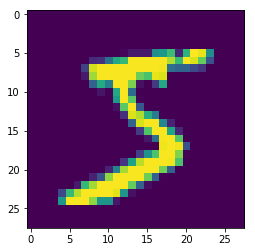

In [0]:
# Plot the image
plt.imshow(img)

It looks like a "5". We can confirm that by looking at the given label.

In [0]:
# Plot the tenth image in the test data
# Find out the corresponding label
# You code goes here








In [0]:
# Print the corresponding lable
print(y_train[0])

5


In [0]:
# Normalise the data (so that they lie between 0 and 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [0]:
# Create a variable to hold this configuration
input_shape = (28, 28, 1)

In [0]:
# Check the dimension of the training and test images
print('x training shape:', x_train.shape)
print('x testing shape:', x_test.shape)

x training shape: (60000, 28, 28, 1)
x testing shape: (10000, 28, 28, 1)


In [0]:
# Similarly, preprocess the labels for training and test
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [0]:
# If you print y_train[0] now, what will you get?
# What do you think to_categorial() has done?
# Your code goes here







In [0]:
# Define the deep learning structure

# Initialise the model, it's empty at the beginning
model = keras.models.Sequential()

# Add the first convolutional layer
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), 
                              activation='relu', input_shape=input_shape))
# Add the first pooling layer
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
# Similarly the second convolutional layer
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
# The second pooling layer
model.add(keras.layers.MaxPooling2D((2,2)))

# Flatten the image (pulled into an array)
model.add(keras.layers.Flatten())
# Feed the array into a densely-connected neural network
model.add(keras.layers.Dense(128, activation='relu'))
# Use the softmax to map the output to probabilities
model.add(keras.layers.Dense(10, activation='softmax'))

W0829 04:42:25.650391 139706172225408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 04:42:25.706206 139706172225408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 04:42:25.717559 139706172225408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 04:42:25.766879 139706172225408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
# Configure the training details, e.g. what optimiser to use
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

W0829 04:44:21.999515 139706172225408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0829 04:44:22.009275 139706172225408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
# Fit the model. The loss and accuracy will be outputed by default.
history = model.fit(x_train, y_train,
          batch_size=512,
          epochs=4)
# Roughly takes 4 minutes

W0829 04:44:24.864508 139706172225408 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0829 04:44:25.128545 139706172225408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/4
60000/60000 [==============================] - 42s 708us/step - loss: 0.5220 - acc: 0.8426
Epoch 2/4
60000/60000 [==============================] - 42s 700us/step - loss: 0.1071 - acc: 0.9670
Epoch 3/4
60000/60000 [==============================] - 42s 702us/step - loss: 0.0718 - acc: 0.9782
Epoch 4/4
60000/60000 [==============================] - 42s 702us/step - loss: 0.0540 - acc: 0.9834


In [0]:
# Plot the training curve
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
plt.plot(np.array(history.epoch)+1,history.history['acc'], '-o', 
         c='darkcyan',
         markersize=10)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training accuracy vs epoch')

In [0]:
# Evaluate the performance
performance = model.evaluate(x_test, y_test)
print('The loss is %.3f and the accuracy is %.3f on the test data' 
      % tuple(performance))

10000/10000 [==============================] - 2s 248us/step
The loss is 0.103 and the accuracy is 0.963 on the test data


## Fine tune the network (25 minutes)
Make a CNN of your own (refer the code above) and make some changes. This could be 

* a layer
* an activation function
* the number of convolution filers
* the convolution kernel size
* the cost function
* the mini-batch size
* the epotch
* the optimiser

Does your change improve the result? Make at least three tunes and observed the differece in the tutorial. In practice, you can do a grid search by a spliting the current training data into a smaller training dataset and a validation set (sometimes called the development set).

## The MNIST fashion dataset (~ 30 minutes)
Use the same technique on the [MNIST Fashion dataset](https://github.com/zalandoresearch/fashion-mnist). 

To download the data:


In [1]:
! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

--2019-09-05 05:48:07--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.73.62
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.73.62|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M  17.1MB/s    in 1.5s    

2019-09-05 05:48:09 (17.1 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2019-09-05 05:48:10--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.73.62
Connecting to fashion-mnist.s3-website.eu-central-1.amazona

In [0]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


In [4]:
!ls

sample_data		   train-images-idx3-ubyte.gz
t10k-images-idx3-ubyte.gz  train-labels-idx1-ubyte.gz
t10k-labels-idx1-ubyte.gz


In [0]:
# It will override the MNIST data
# Rename if you want
x_train, y_train = load_mnist('.', 'train')
x_test, y_test = load_mnist('.', 't10k')